In [1]:
import numpy as np
from scipy import sparse as sp
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt
from matplotlib.ticker import IndexLocator
import time, sys
import pickle
from scipy.stats import qmc

In [2]:
LHS_seed=0

# Given parameters
nx = 60
ny = 60
tf = 5.0
dt = 1.0e-2
nt = int(tf/dt)
xmin = 0; xmax = 1
ymin = 0; ymax = 1
dims=(nx,ny)

# POD basis
num_basis=np.array([3,4,5,6])
print('num_basis {}'.format(num_basis))

# parameters
p_inter=5
FOM_parameters = np.arange(75,125+1,1,dtype=int)
print("Prediction Parameters: {}".format(FOM_parameters))
print("training parameters={}".format(FOM_parameters[p_inter:-p_inter:p_inter]))

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

# file path
file_path_gappy_LHS_result = "../__result/ex23_wave/ex23_POD_inner_LHS_seed_{}_gappy_result.p".format(LHS_seed)
file_name_SVD="../__model/ex23_wave/ex23_SVD.p"

# full, inner, bc index
multi_index_i,multi_index_j=np.meshgrid(np.arange(nx),np.arange(ny),indexing='xy')
full_multi_index=(multi_index_j.flatten(),multi_index_i.flatten())
x0_multi_index=(multi_index_j[:,0].flatten(),multi_index_i[:,0].flatten())
x1_multi_index=(multi_index_j[:,-1].flatten(),multi_index_i[:,-1].flatten())
y0_multi_index=(multi_index_j[0,:].flatten(),multi_index_i[0,:].flatten())
y1_multi_index=(multi_index_j[-1,:].flatten(),multi_index_i[-1,:].flatten())

dims=(ny,nx)
full_raveled_indicies=np.ravel_multi_index(full_multi_index,dims)
x0_raveled_indicies=np.ravel_multi_index(x0_multi_index,dims)
x1_raveled_indicies=np.ravel_multi_index(x1_multi_index,dims)
y0_raveled_indicies=np.ravel_multi_index(y0_multi_index,dims)
y1_raveled_indicies=np.ravel_multi_index(y1_multi_index,dims)
bc_raveled_indicies=np.unique(np.concatenate((x0_raveled_indicies,x1_raveled_indicies,
                                              y0_raveled_indicies,y1_raveled_indicies)))
inner_raveled_indicies=np.setdiff1d(full_raveled_indicies,bc_raveled_indicies)

num_basis [3 4 5 6]
Prediction Parameters: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]
training parameters=[ 80  85  90  95 100 105 110 115 120]


# of measurments: 12
[ 353  422  718  968 1271 1707 1839 2176 2499 2749 3214 3323]


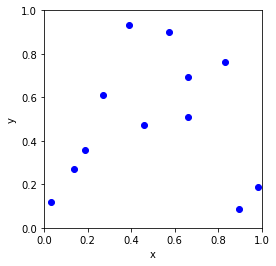

In [3]:
# LHS
num_msmt = 12
sampler = qmc.LatinHypercube(d=2,seed=LHS_seed)
sample=sampler.integers(l_bounds=[1, 1], u_bounds=[ny-1,nx-1], n=num_msmt, endpoint=False)
msmt_idx=np.sort(np.ravel_multi_index((sample[:,0],sample[:,1]),dims))

num_msmt=len(msmt_idx)
print("# of measurments: {}".format(num_msmt))
print(msmt_idx)

# plot measuremnt positions
plt.figure()
plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
plt.axis('square')
plt.axis([xmin,xmax,ymin,ymax])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("../__result/ex23_wave/ex23_POD_LHS_seed_{}_{}_samples.png".format(LHS_seed,num_msmt))

# gappyPOD

# of POD basis is 3
# of measurments: 12
[ 353  422  718  968 1271 1707 1839 2176 2499 2749 3214 3323]


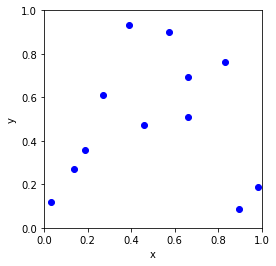

Param is 75
Time elapsed: 1.7628028392791748 sec
average relative error of u: 3.511762879745288%
maximum relative error of u: 5.281719332935376%

Param is 76
Time elapsed: 1.8902771472930908 sec
average relative error of u: 3.3735870161248975%
maximum relative error of u: 5.107370967855209%

Param is 77
Time elapsed: 1.9180619716644287 sec
average relative error of u: 3.255192412257603%
maximum relative error of u: 4.95457230749712%

Param is 78
Time elapsed: 1.8413660526275635 sec
average relative error of u: 3.160245192298238%
maximum relative error of u: 4.8223537290088885%

Param is 79
Time elapsed: 1.517209768295288 sec
average relative error of u: 3.092215047440883%
maximum relative error of u: 4.714015820955069%

Param is 80
Time elapsed: 1.6679387092590332 sec
average relative error of u: 3.0543195088566306%
maximum relative error of u: 4.6328644943649255%

Param is 81
Time elapsed: 1.789961338043213 sec
average relative error of u: 3.0489821411663303%
maximum relative error of

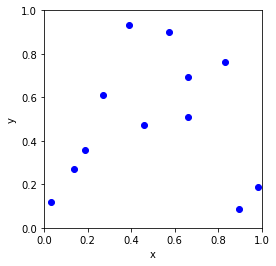

Param is 75
Time elapsed: 1.6211457252502441 sec
average relative error of u: 3.3896581744283942%
maximum relative error of u: 5.102933657300715%

Param is 76
Time elapsed: 1.5489799976348877 sec
average relative error of u: 3.305850633898049%
maximum relative error of u: 4.994482489536201%

Param is 77
Time elapsed: 1.8654062747955322 sec
average relative error of u: 3.2296405427701664%
maximum relative error of u: 4.895530437599035%

Param is 78
Time elapsed: 1.8614788055419922 sec
average relative error of u: 3.1625678792352736%
maximum relative error of u: 4.807795454380629%

Param is 79
Time elapsed: 1.956202745437622 sec
average relative error of u: 3.1060960702113705%
maximum relative error of u: 4.7331325565774%

Param is 80
Time elapsed: 1.9576678276062012 sec
average relative error of u: 3.0618377775911085%
maximum relative error of u: 4.673506895377167%

Param is 81
Time elapsed: 1.6780495643615723 sec
average relative error of u: 3.031264209007518%
maximum relative error of

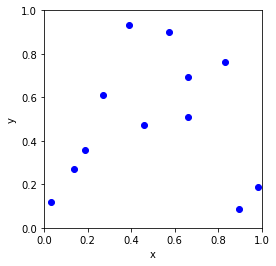

Param is 75
Time elapsed: 1.382793664932251 sec
average relative error of u: 3.3821822770289867%
maximum relative error of u: 5.0655498146872535%

Param is 76
Time elapsed: 1.6576707363128662 sec
average relative error of u: 3.3310596140279065%
maximum relative error of u: 4.994237729961059%

Param is 77
Time elapsed: 3.3324546813964844 sec
average relative error of u: 3.2799775745959847%
maximum relative error of u: 4.922892108429632%

Param is 78
Time elapsed: 1.3127284049987793 sec
average relative error of u: 3.229059295584844%
maximum relative error of u: 4.851569578831021%

Param is 79
Time elapsed: 1.86348557472229 sec
average relative error of u: 3.178274337968369%
maximum relative error of u: 4.780334063431946%

Param is 80
Time elapsed: 2.433583974838257 sec
average relative error of u: 3.1277420989105833%
maximum relative error of u: 4.709363969227288%

Param is 81
Time elapsed: 1.228492259979248 sec
average relative error of u: 3.0774782610197384%
maximum relative error of 

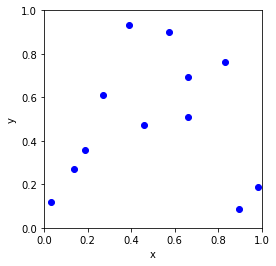

Param is 75
Time elapsed: 8.498067378997803 sec
average relative error of u: 2.293183357766607%
maximum relative error of u: 3.358932250510818%

Param is 76
Time elapsed: 1.6979291439056396 sec
average relative error of u: 2.2622427744921554%
maximum relative error of u: 3.3033630564896277%

Param is 77
Time elapsed: 25.150315284729004 sec
average relative error of u: 2.2311130625536846%
maximum relative error of u: 3.247924489859413%

Param is 78
Time elapsed: 11.32240915298462 sec
average relative error of u: 2.199815210005893%
maximum relative error of u: 3.192610250893225%

Param is 79
Time elapsed: 1.474280595779419 sec
average relative error of u: 2.1683415309890997%
maximum relative error of u: 3.1374500399555605%

Param is 80
Time elapsed: 1.0610711574554443 sec
average relative error of u: 2.136743611386115%
maximum relative error of u: 3.0825084417264312%

Param is 81
Time elapsed: 1.3965404033660889 sec
average relative error of u: 2.1050435799375373%
maximum relative error 

In [4]:
solution=np.zeros((len(num_basis),len(FOM_parameters),nt+1,nx*ny))
avg_rel_err=np.zeros((len(num_basis),len(FOM_parameters)))
rel_err=np.zeros((len(num_basis),len(FOM_parameters),nt+1))
elapsed_time=np.zeros((len(num_basis),len(FOM_parameters)))

with open(file=file_name_SVD, mode='rb') as ff:  
    SVD = pickle.load(ff)

for ii in range(len(num_basis)):
    POD_basis=num_basis[ii]
    print("# of POD basis is {}".format(POD_basis))
    
    # LHS
    num_msmt = 12
    sampler = qmc.LatinHypercube(d=2,seed=LHS_seed)
    sample=sampler.integers(l_bounds=[1, 1], u_bounds=[ny-1,nx-1], n=num_msmt, endpoint=False)
    msmt_idx=np.sort(np.ravel_multi_index((sample[:,0],sample[:,1]),dims))

    num_msmt=len(msmt_idx)
    print("# of measurments: {}".format(num_msmt))
    print(msmt_idx)

    # plot measuremnt positions
    plt.figure()
    plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
    plt.axis('square')
    plt.axis([xmin,xmax,ymin,ymax])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    # Basis matrix
    phi_u = SVD['U'][:,:POD_basis]

    phim_u=phi_u[msmt_idx]
    phim_u_pinv=np.linalg.pinv(phim_u)
    
    for jj in range(len(FOM_parameters)):
        FOM_parameter=FOM_parameters[jj]
        print("Param is {}".format(FOM_parameter))
        
        # Load FOM solution
        ex = np.load('../__data/ex23_wave/ex23_interp_{}.npz'.format(FOM_parameter), allow_pickle = True)
        ex = ex.f.arr_0
        u_full = ex.reshape(nt+1,-1)

        # take measurments
        um = u_full[:,msmt_idx]

        # Initial condition
        u0=u_full[0]
        u_ref = u0

        # Gappy POD
        t_start_gappyPOD=time.time()

        # solution
        u_gappyPOD=np.zeros((nt+1,ny*nx))
        u_hat=np.zeros((nt+1,POD_basis))

        # IC
        u_hat0=np.zeros(POD_basis)
        u_gappyPOD[0]=np.copy(u0)

        for n in range(nt):
            u_hat[n+1] = phim_u_pinv.dot(um[n+1]-u_ref[msmt_idx])
            u_gappyPOD[n+1] = u_ref + phi_u.dot(u_hat[n+1])

        # elapsed time
        t_elapsed_gappyPOD=time.time()-t_start_gappyPOD
        print('Time elapsed: {} sec'.format(t_elapsed_gappyPOD))

        # error
        u_rel_err_gappyPOD=np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)/np.linalg.norm(u_full,ord=2,axis=1)*100
        u_avg_rel_err=np.sqrt(np.sum(np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)**2))/np.sqrt(np.sum(np.linalg.norm(u_full,ord=2,axis=1)**2))*100
        print("average relative error of u: {}%".format(u_avg_rel_err))
        print("maximum relative error of u: {}%".format(np.max(u_rel_err_gappyPOD)))
        print()

        # save result
        solution[ii,jj]=u_gappyPOD
        avg_rel_err[ii,jj]=u_avg_rel_err
        rel_err[ii,jj]=u_rel_err_gappyPOD
        elapsed_time[ii,jj]=t_elapsed_gappyPOD
    
results={'solution':solution,'avg_rel_err':avg_rel_err,'rel_err':rel_err,'elapsed_time':elapsed_time}
with open(file=file_path_gappy_LHS_result, mode='wb') as ff:
    pickle.dump(results, ff)

In [5]:
print(num_basis)
idx=[0,1,2,3]
num_basis[idx]

[3 4 5 6]


array([3, 4, 5, 6])

Text(0.5, 1.0, 'Max. Rel. Err. vs Parameters')

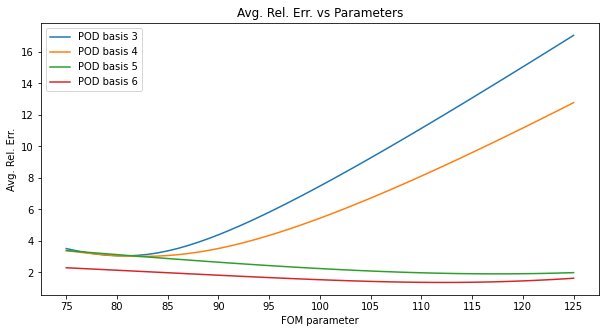

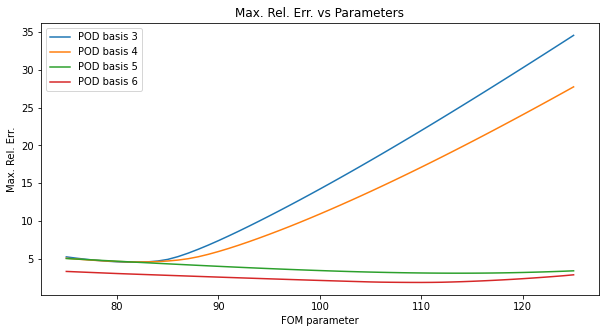

In [6]:
# with open(file=file_path_gappy_LHS_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:   
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex23_wave/ex23_POD_inner_LHS_seed_{}_avg_rel_err.png".format(LHS_seed))

# figure rel.err vs data points
plt.figure(figsize=(10,5))
plt_inter=1
for i in idx:   
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex23_wave/ex23_POD_inner_LHS_seed_{}_max_rel_err.png".format(LHS_seed))

In [7]:
idx=[3]
POD_basis=num_basis[idx]
print(POD_basis)

[6]


Text(0.5, 1.0, 'Max. Rel. Err. vs Parameters')

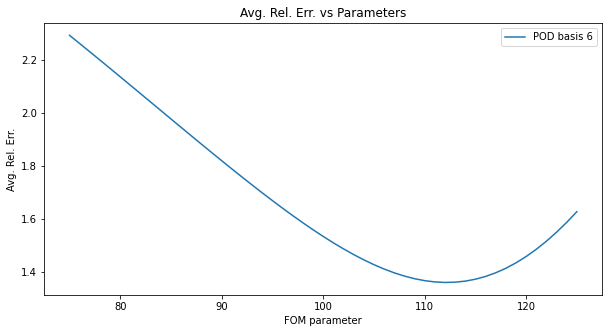

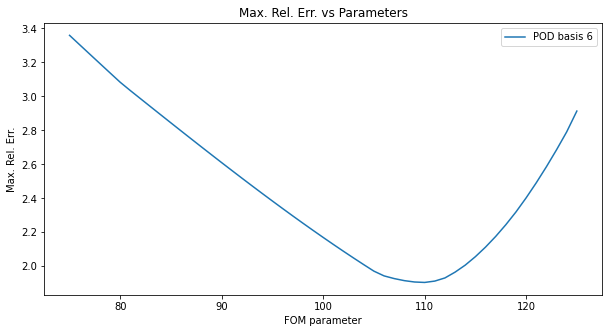

In [8]:
# with open(file=file_path_gappy_LHS_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:   
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex23_wave/ex23_POD_{}_LHS_seed_{}_avg_rel_err.png".format(POD_basis,LHS_seed)

# figure rel.err vs data points
plt.figure(figsize=(10,5))
plt_inter=1
for i in idx:   
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex23_wave/ex23_POD_{}_LHS_seed_{}_max_rel_err.png".format(POD_basis,LHS_seed)

In [9]:
print(num_basis)
print(FOM_parameters)

[3 4 5 6]
[ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]


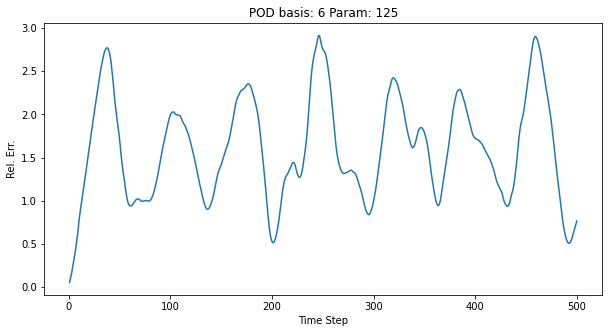

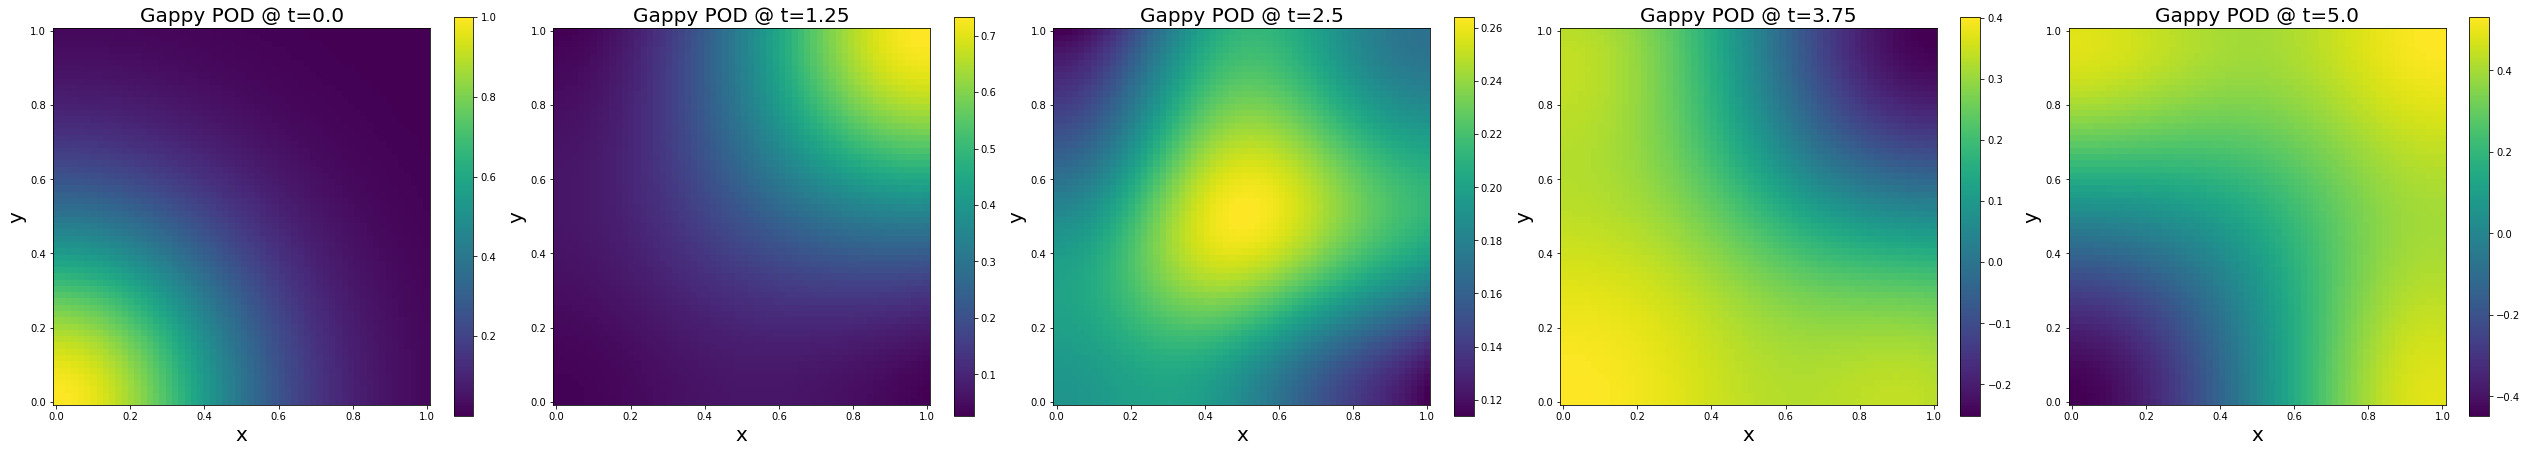

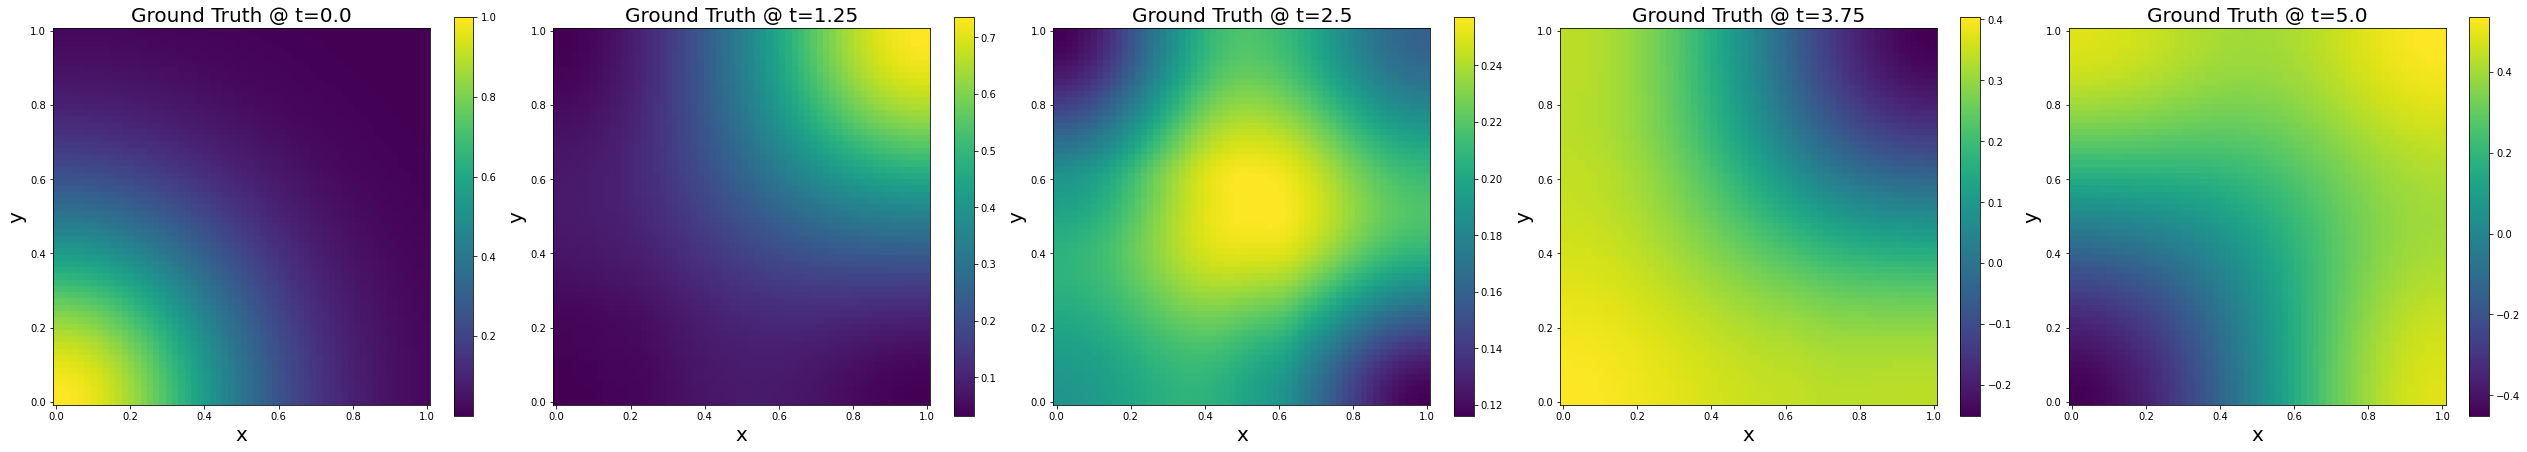

In [10]:
# figure rel.err vs at given param and POD basis
i=3;j=-1
POD_basis=num_basis[i]                 
param=FOM_parameters[j]

u_gappyPOD=results['solution'][i,j]

ex = np.load('../__data/ex23_wave/ex23_interp_{}.npz'.format(param), allow_pickle = True)
ex = ex.f.arr_0
u_full = ex.reshape(nt+1,-1)

plt.figure(figsize=(10,5))
plt.plot(np.arange(1,nt+1),results['rel_err'][i,j,1:].flatten())
plt.xlabel('Time Step')
plt.ylabel('Rel. Err.')
plt.title("POD basis: {} Param: {}".format(POD_basis,param))
plt.show()

# plot original data
vmin=-1; vmax=1
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)*i].reshape(ny,nx))#,vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Gappy POD @ t={}'.format(int(nt/4)*i*dt),fontsize=20)
    fig.colorbar(pcm, ax=ax,shrink=0.8)

# fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("../__result/ex23_wave/ex23_POD_{}_param_{}_inner_LHS_seed_{}_SOL.png".format(POD_basis,param,LHS_seed))

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*i].reshape(ny,nx))#,vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Ground Truth @ t={}'.format(int(nt/4)*i*dt),fontsize=20)
    fig.colorbar(pcm, ax=ax,shrink=0.8)

# fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("../__result/ex23_wave/ex23_param_{}_ground_truth.png".format(param))